In [1]:
import os
import warnings
import pandas as pd
from helper_figure_plotters import ffc_plotter,\
                                   load_sympt,\
                                   plot_three_predictions,\
                                   plot_mvprobit,\
                                   plot_four_simple_examples,\
                                   plot_collisions
warnings.filterwarnings("ignore")
figure_path = os.path.join(os.getcwd(), '..', 'figures')

[*********************100%%**********************]  1 of 1 completed


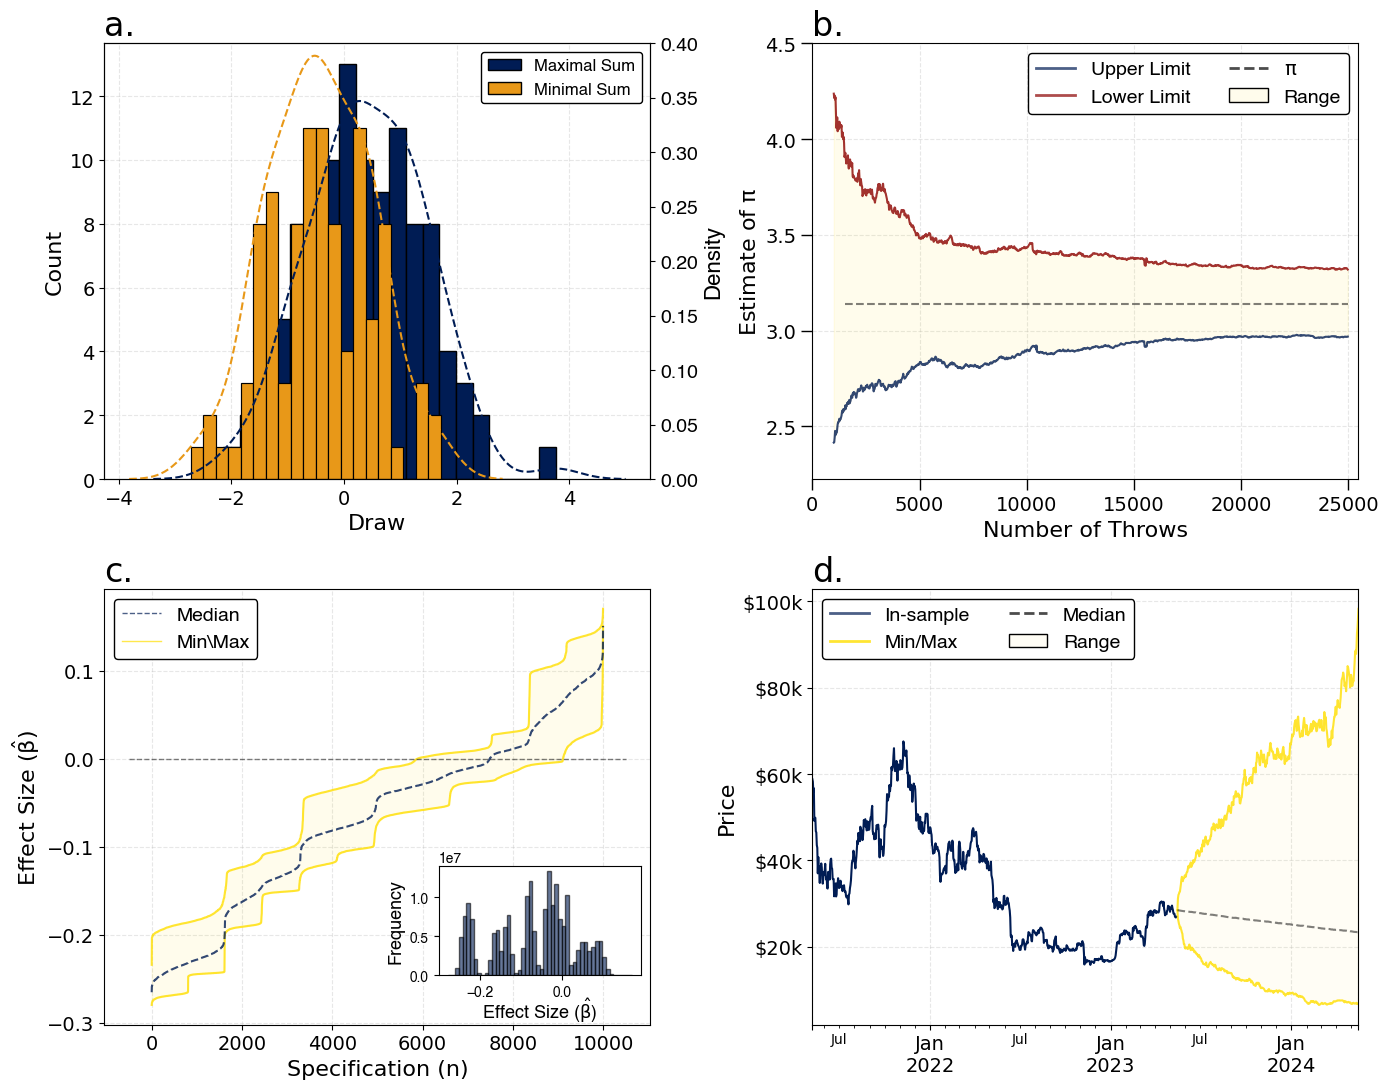

In [2]:
plot_four_simple_examples(figure_path)

Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Processing chunk 16
Processing chunk 17
Processing chunk 18
Processing chunk 19
Processing chunk 20
Processing chunk 21
Processing chunk 22
Processing chunk 23
Processing chunk 24
Processing chunk 25
Processing chunk 26
Processing chunk 27
Processing chunk 28
Processing chunk 29
Processing chunk 30
Processing chunk 31
Processing chunk 32
Processing chunk 33
Processing chunk 34
Processing chunk 35
Processing chunk 36
Processing chunk 37
Processing chunk 38
Processing chunk 39
Processing chunk 40
Processing chunk 41
Processing chunk 42
Processing chunk 43
Processing chunk 44
Processing chunk 45
Processing chunk 46
Processing chunk 47
Processing chunk 48
Processing chunk 49
Processing chunk 50
Processin

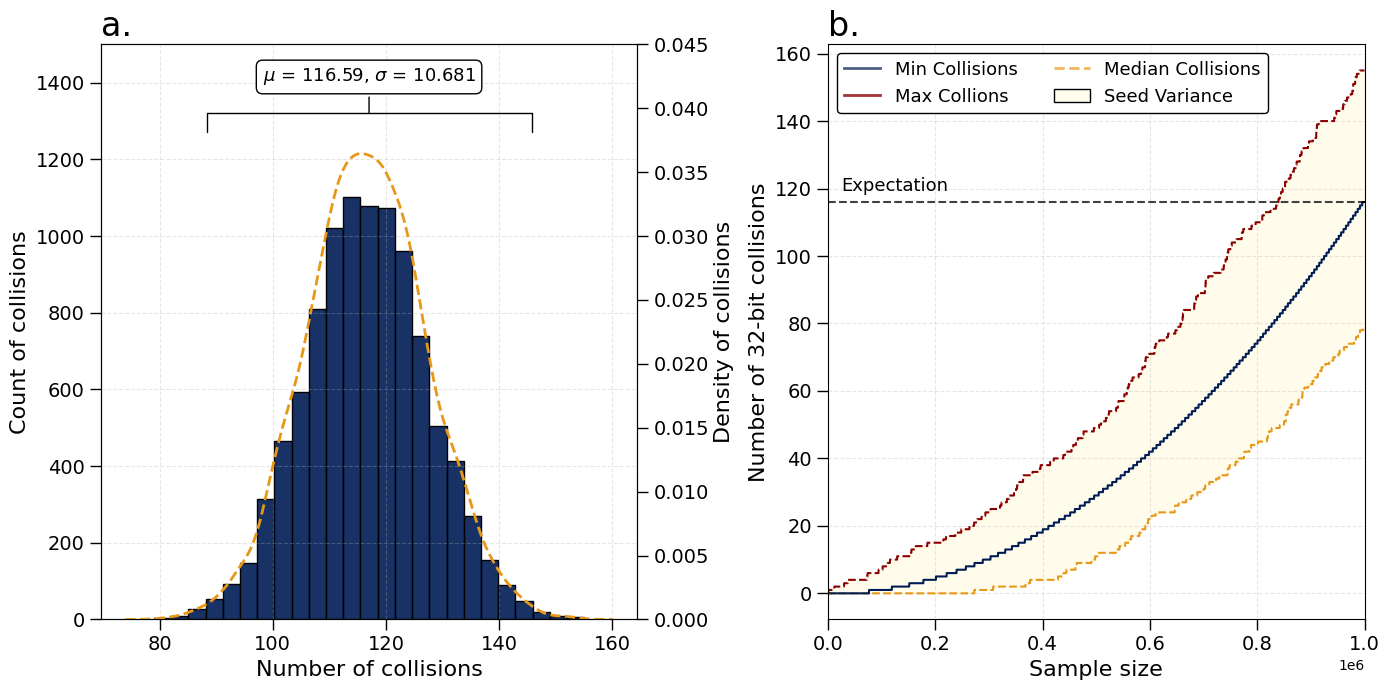

In [2]:
plot_collisions(figure_path)

Covid min:  0.6706358899202085
Covid max:  0.8123153511526741
Covid mean:  0.7430775679453714
Housing min:  0.6169448843495055
Housing max:  0.6822833025180896
Housing mean:  0.6551870205941672
MNIST min:  9001
MNIST max:  9728
MNIST mean:  9623.3025


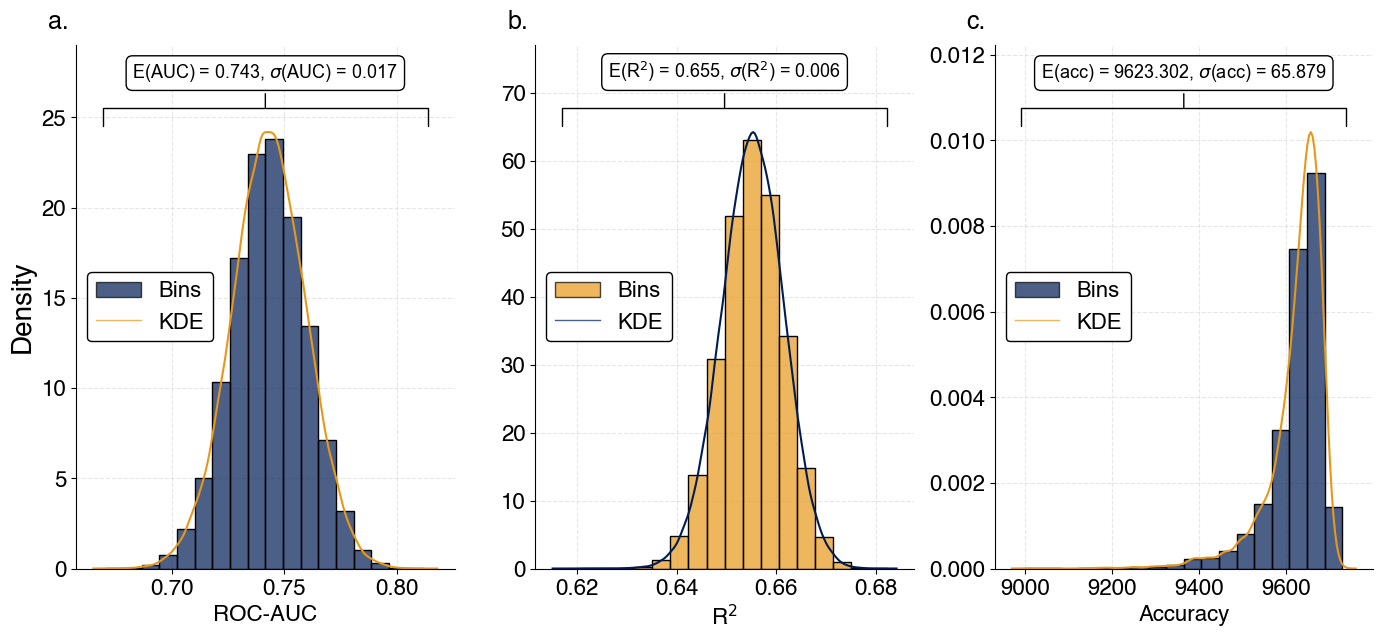

In [3]:
filename = 'roc_auc_full_firstwave_5folds_10kseeds_stratified.csv'
first_wave_10k_stratified_list = load_sympt(filename)
plot_three_predictions(first_wave_10k_stratified_list, figure_path)

Min value of $\rho_{21}$ at 2 draws: -0.53390896
Max value of $\rho_{21}$ at 2 draws: 0.25147465
Min value of $\rho_{21}$ at 150 draws: -0.35242346
Max value of $\rho_{21}$ at 150 draws: -0.18469827


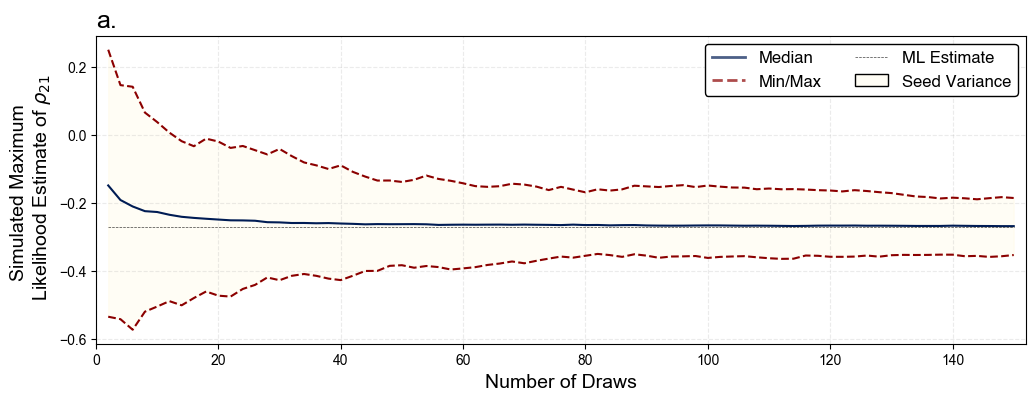

In [4]:
plot_mvprobit(figure_path)

gpa. Min beta :0.1193. Max beta: 0.2435. Min R2: 0.0558. Max R2: 0.1498
grit. Min beta :-0.0104. Max beta: 0.0747. Min R2: 0.0023. Max R2: 0.0228
materialHardship. Min beta :0.3538. Max beta: 0.3779. Min R2: 0.1657. Max R2: 0.1892
eviction. Min beta :1.5946. Max beta: 1.9301. Min R2: 0.0098. Max R2: 0.0209
jobTraining. Min beta :0.601. Max beta: 0.8201. Min R2: 0.0443. Max R2: 0.0559
layoff. Min beta :0.2313. Max beta: 0.4929. Min R2: 0.0032. Max R2: 0.0117


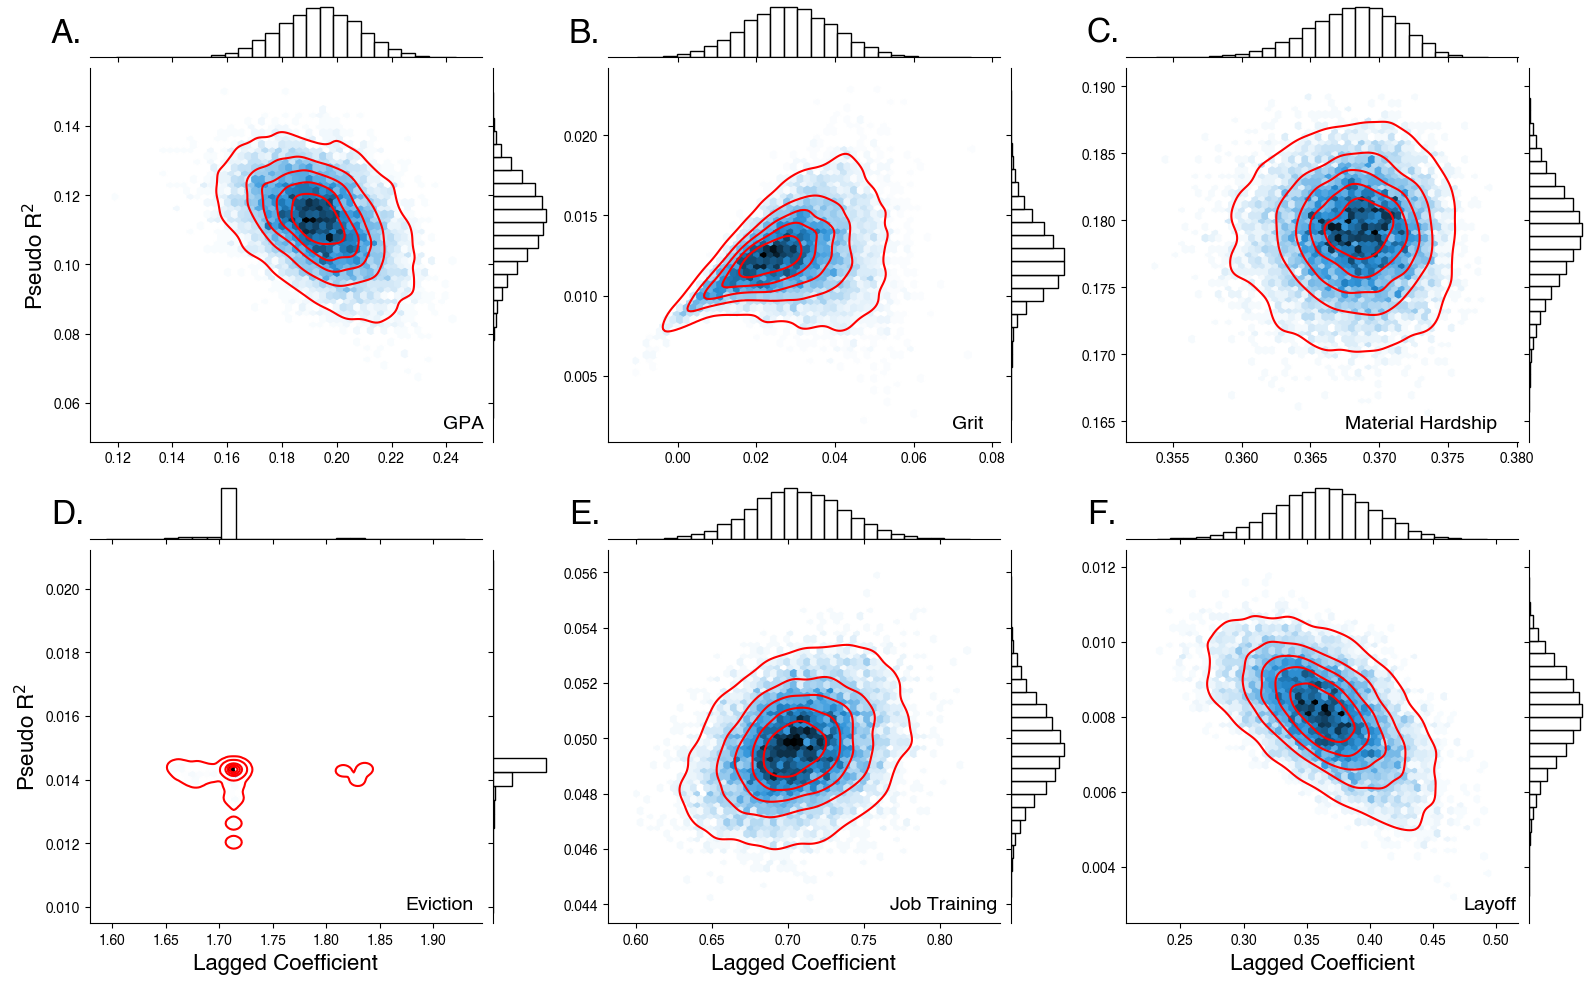

In [5]:
ffc = pd.read_csv(os.path.join(os.getcwd(), '..', 'data', 'ffc',
                               'output', 'seed',
                               'seed_analysis_10000.csv'))
ffc_plotter(ffc, figure_path)

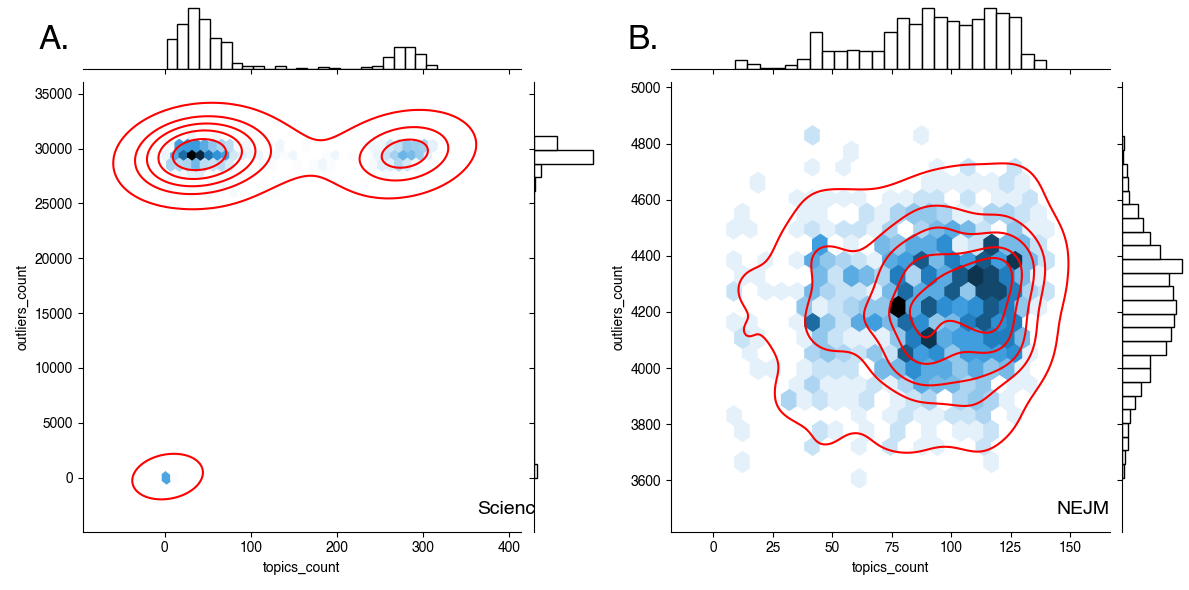

In [2]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
mpl.rcParams['font.family'] = 'Helvetica'

#nature = pd.read_csv(os.path.join(os.getcwd(),
#                     '..',
#                     'data',
##                     'bibliometric',
#                     'meta_data',
#                     'metadata_nature.csv')
#                    )

science = pd.read_csv(os.path.join(os.getcwd(),
                      '..',
                      'data',
                      'bibliometric',
                      'meta_data',
                      'metadata_science.csv')
                     )

#pnas = pd.read_csv(os.path.join(os.getcwd(),
#                     '..',
#                     'data',
#                     'bibliometric',
#                     'meta_data',
#                     'metadata_pnas.csv')
#                    )

nejm = pd.read_csv(os.path.join(os.getcwd(),
                    '..',
                    'data',
                    'bibliometric',
                    'meta_data',
                    'metadata_nejm.csv')
                    )


class SeabornFig2Grid():
    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())


def jointplotter(df, counter):
    title_list = ['A.', 'B.', 'C.', 'D.', 'E.', 'F.']
    title = title_list[counter]
    g = sns.jointplot(x=df['topics_count'],
                      y=df['outliers_count'],
                      kind='hex',
                      marginal_kws=dict(bins=25,
                                        color='w'))
    g.plot_joint(sns.kdeplot, color="r", levels=6)
    g.ax_marg_x.annotate(title, xy=(-0.1, .45), xycoords='axes fraction',
                ha='left', va='center', fontsize=24)
    return g

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)
figurez = []

#figurez.append(jointplotter(nature, 0))
figurez.append(jointplotter(science, 0))
#figurez.append(jointplotter(pnas, 2))
figurez.append(jointplotter(nejm, 1))
#tmp = SeabornFig2Grid(figurez[0], fig, gs[0])
tmp = SeabornFig2Grid(figurez[0], fig, gs[0])
#tmp = SeabornFig2Grid(figurez[2], fig, gs[2])
tmp = SeabornFig2Grid(figurez[1], fig, gs[1])

figurez[0] = figurez[0].ax_joint.annotate('Science', xy=(0.9, 0.05),
                                          xycoords='axes fraction',
                                          ha='left', va='center', fontsize=14)
figurez[1] = figurez[1].ax_joint.annotate('NEJM', xy=(0.878, 0.05),
                                          xycoords='axes fraction',
                                          ha='left', va='center', fontsize=14)
#figurez[2] = figurez[2].ax_joint.annotate('Material Hardship', xy=(0.56, 0.05),
#                                          xycoords='axes fraction',
#                                          ha='left', va='center', fontsize=14)
#figurez[3] = figurez[3].ax_joint.annotate('Eviction', xy=(0.805, 0.05),
#                                          xycoords='axes fraction',
#                                          ha='left', va='center', fontsize=14)
gs.tight_layout(fig)
gs.update(hspace=0.1)
figure_path = os.path.join(os.getcwd(), '..', 'figures')
plt.savefig(os.path.join(figure_path, 'topic_modelling_seeds2.pdf'), bbox_inches='tight')
plt.show()

Science mean number of topics: 98.931
Science min number of topics: 2
Science max number of topics: 316
NEJM mean number of topics: 91.30661322645291
NEJM min number of topics: 9.0
NEJM max number of topics: 140.0


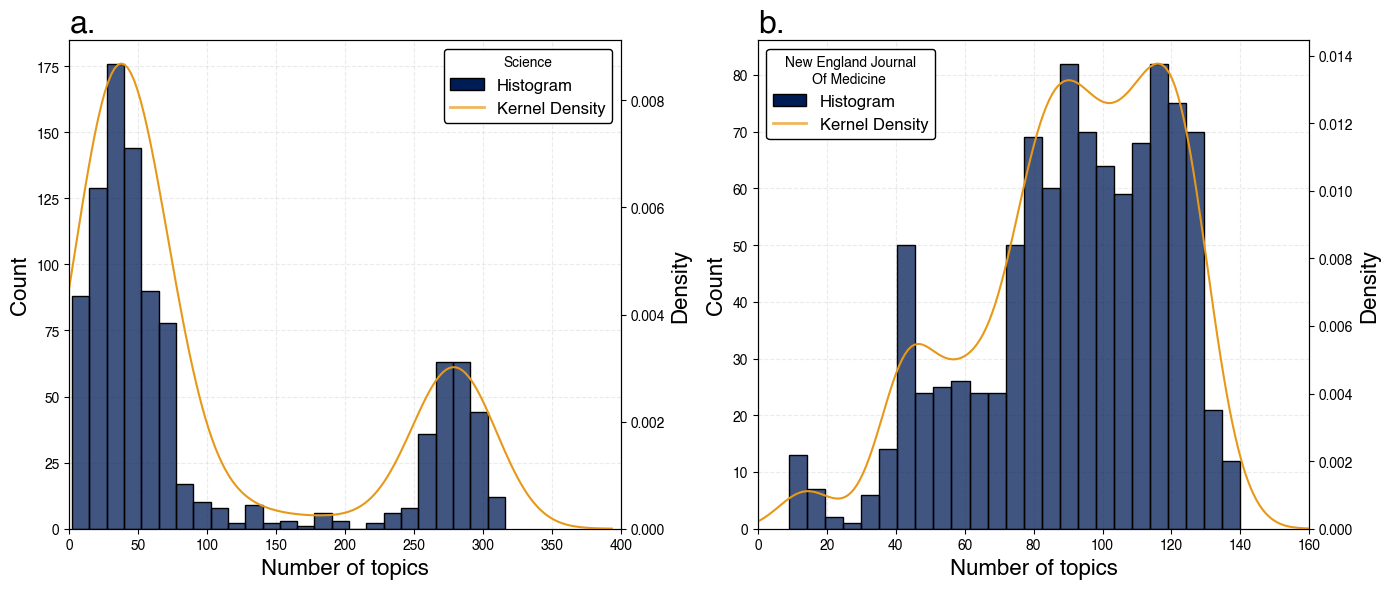

In [24]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

fig, ((ax1, ax2)#
      #(ax3, ax4)
     ) = plt.subplots(1, 2, figsize=(14, 6))
colors = ['#001c54', '#E89818']
nbins=25
#sns.histplot(nature['topics_count'],
#             ax=ax1,
#             bins=nbins)
#ax1_twin = ax1.twinx()
#sns.kdeplot(nature['topics_count'], ax=ax1_twin, color=colors[1])
#
sns.histplot(science['topics_count'],
             ax=ax1,
             color=colors[0],
             bins=nbins)
ax1_twin = ax1.twinx()
sns.kdeplot(science['topics_count'], ax=ax1_twin, color=colors[1])

#sns.histplot(pnas['topics_count'],
#             ax=ax3,
#             bins=nbins)
#ax3_twin = ax3.twinx()
#sns.kdeplot(pnas['topics_count'], ax=ax3_twin, color=colors[1])

sns.histplot(nejm['topics_count'],
             ax=ax2,
             color=colors[0],
             bins=nbins)
ax2_twin = ax2.twinx()
sns.kdeplot(nejm['topics_count'], ax=ax2_twin, color=colors[1])

ax1.set_title('a.', loc='left', fontsize=23)
ax2.set_title('b.', loc='left', fontsize=23)
#ax3.set_title('c.', loc='left', fontsize=22)
#ax4.set_title('d.', loc='left', fontsize=22)
ax1.set_xlim(0, 400)
ax2.set_xlim(0, 160)
#ax3.set_xlim(0, ax3.get_xlim()[1])
#ax4.set_xlim(0, ax4.get_xlim()[1])
ax1.grid(which = "both", linestyle='--', alpha=0.25)
ax2.grid(which = "both", linestyle='--', alpha=0.25)
#ax3.grid(which = "both", linestyle='--', alpha=0.25)
#ax4.grid(which = "both", linestyle='--', alpha=0.25)

ax1.set_axisbelow(True)
ax2.set_axisbelow(True)


legend_elements1 = [
    Patch(facecolor=colors[0], edgecolor=(0, 0, 0, 1),
          label=r'Histogram'),
    Line2D([0], [0], color=colors[1], lw=2, linestyle='-',
           label=r'Kernel Density', alpha=0.7)
]
ax1.legend(handles=legend_elements1, loc='upper right', frameon=True,
           fontsize=12, framealpha=1, facecolor='w',
           edgecolor=(0, 0, 0, 1), ncols=1, title='Science'
           )
ax2.legend(handles=legend_elements1, loc='upper left', frameon=True,
           fontsize=12, framealpha=1, facecolor='w',
           edgecolor=(0, 0, 0, 1), ncols=1, title='New England Journal\n       Of Medicine'
           )
#print(nature['topics_count'].mean())
print(f"Science mean number of topics: {science['topics_count'].mean()}")
print(f"Science min number of topics: {science['topics_count'].min()}")
print(f"Science max number of topics: {science['topics_count'].max()}")
print(f"NEJM mean number of topics: {nejm['topics_count'].mean()}")
print(f"NEJM min number of topics: {nejm['topics_count'].min()}")
print(f"NEJM max number of topics: {nejm['topics_count'].max()}")
    
    
ax1_twin.set_ylabel('Density', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.set_xlabel('Number of topics', fontsize=16)
ax2_twin.set_ylabel('Density', fontsize=16)
ax2.set_ylabel('Count', fontsize=16)
ax2.set_xlabel('Number of topics', fontsize=16)
plt.tight_layout()